# **Next Day Percent Return for Bitcoin**
## Fall 2025 Data Science Project
### *Made by*: Ryan Kimberling, Rayan Reddy, and Rishit Jindal

**Contributions:**

Summarize the contributions in 1-2 sentences. Be specific:

A: Project idea - Rayan Reddy, Ryan Kimberling, and Rishit Jindal

We all came up with a couple ideas together and narrowed down the options to the idea with the most available data and most common information online for personal research. We decided to go with the Bitcoin predictive idea because of the clean data availability and growing field of cryptocurrency.

B: Dataset Curation and Preprocessing - Rayan Reddy, Ryan Kimerbling, and Rishit Jindal

Rayan found the datasets from Kaggle with high public usage and reliable data inputs. Ryan and Rishit cleaned the data, making sure that timestamps were a consistent format, that there were no missing values, and that there are no significant outliers.

C: Data Exploration and Summary Statistics - Ryan Kimberling, Rishit Jindal, and Rayan Reddy

We all worked on the data exploration, conducting different tests and formulations to see how the data is related and complete. Ryan conducted a T-test to see whether there was a significant difference in average Bitcoin trading volumes between weekends and weekdays. Rishit conducted a cumulative return analysis on the return values of Bitcoin. Finally, Rayan conducted a correlation analysis to see how Bitcoin prices were correlated with other cryptocurrencies such as Ethereum and XPR.

D: ML Algorithm Design/Development - Rayan Reddy

Rayan developed a Random Forest, XGBoost, and LSTM neural network model to create predictions on Bitcoin prices and to find the relation between Bitcoin prices and Ethereum prices. He created extra features to develop a even field for all the models to be compared on. The algorithms were tested for compilation errors and then tuned for hyperparameters to make sure all models were equally being compared.

E: ML Algorithm Training and Test Data Analysis - Rayan Reddy and Rishit Jindal

Rayan and Rishit conducted an analysis on the plots to give conclusions on what those plots were showing and what we could find from those tests.

F: Visualization, Result Analysis, Conclusion - Ryan Kimberling and Rishit Jindal

Ryan and Rishit wrote the conclusion of our report, summarizing the findings from all the data exploration and ML analysis. They provided information for new and experienced readers regarding our findings about Bitcoin price movements and relation between Bitcoin and other cryptocurrencies.

G: Final Tutorial Report Creation - Rishit Jindal, Rayan Reddy, and Ryan Kimberling

The entire tutorial was a culmination of all our efforts. Each of us contributed to various areas of the report and worked together to make the most comprehensive and accurate tutorial we could regarding Bitcoin and other crypocurrencies.

H: Additional (not listed above)

## **Introduction**
Over the last decade Bitcoin has grown from a small technology experiment into a major part of global financial market. Its price can move dramatically from one day to the next, and traders investors are all interested in whether short term price changes are at all predictable. In this project, we focus on Bitcoin’s historical price and volume data to explore how its behavior changes over time and whether recent activity contains useful information about tomorrow’s price movement. <br><br>
Some questions we are trying to answer include: **Can we use the past few days of Bitcoin’s own returns and trading volume to predict its next day percentage price change?** Some deeper questions are 
1. **How does Bitcoin’s behavior differ across weekdays and weekends?**
2. **Do simple patterns in Bitcoin’s recent history provide any meaningful predictive power?**

Answering these questions is important for several reasons. Even a small improvement in prediciting short term returns could matter to traders deciding how much exposure to take in such a volatile asset. The goal is not to become rich, but to identify if there are real trends in the data to predict a pattern for traders.

Below are the libraries used for all the code cells and analysis in this tutorial.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
from scipy import stats
import kagglehub
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import math


C:\Users\rayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Data Curation & Preprocessing**

The source of our data is Kaggle, thus, the type of our data is Secondary. We will be using two datasets for our report. 

Bitcoin Historical Data: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

Firstly, we will be using 'Bitcoin Historical Data'. This dataset contains historical Bitcoin market data collected at 1-minute intervals across several major cryptocurrency exchanges. Each record includes timestamped trading information such as price, volume, and market activity, which enables extensive analysis of Bitcoin’s behavior over time.

Top 50 Cryptos Historical Prices: https://www.kaggle.com/datasets/odins0n/top-50-cryptocurrency-historical-prices

Secondly the 'Top 50 Crypto Historoical Prices' dataset provides daily historical price data—including open, high, low, and close values—for the top 50 cryptocurrencies. Each cryptocurrency is stored in its own CSV file containing its full price history from the date of launch. Additionally, an ALL_COMBINED file aggregates all entries into a single dataset, enabling comparative and multi-asset analysis.

In [ ]:
path1 = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")
path1 = os.path.join(path1, "btcusd_1-min_data.csv")
path2 = kagglehub.dataset_download("odins0n/top-50-cryptocurrency-historical-prices")
path2 = os.path.join(path2, "All_combined.csv")

print("Path to dataset file for Bitcoin Historical Data:", path1)
print("Path to dataset files for Top 50 cryptos historical prices:", path2)

First, we read the csv files, then convert the Timestamp column into Pandas datetime objects, so that we can later use time based operations cleaner. Then we sort the Timestamp column chronologically so we are able to see trends clearer. Finally we drop any duplicated timestamps so that only the first occurence shows, which resolves any skew in the data.

In [5]:
btc = pd.read_csv(path1)

btc["Timestamp"] = pd.to_datetime(btc["Timestamp"], unit="s")
btc = btc.set_index("Timestamp").sort_index()
btc = btc[~btc.index.duplicated(keep="first")]

display(btc.head())

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [6]:
display(btc.tail())

,Open,High,Low,Close,Volume
Timestamp,,,,,
2025-12-09 23:53:00,92766.0,92766.0,92746.0,92749.0,0.066843
2025-12-09 23:54:00,92742.0,92767.0,92719.0,92731.0,0.073100
2025-12-09 23:55:00,92719.0,92719.0,92707.0,92707.0,0.007643
2025-12-09 23:56:00,92709.0,92714.0,92699.0,92709.0,0.028606
2025-12-09 23:57:00,92709.0,92709.0,92676.0,92676.0,0.026255


Next, we run to see if there are missing values in the data. There appears to be none.

In [7]:
display(btc.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Describe this dataset: Gives overview of each column of the dataframe.

In [8]:
display(btc[["Open", "High", "Low", "Close", "Volume"]].describe())

,Open,High,Low,Close,Volume
count,7.330717e+06,7.330717e+06,7.330717e+06,7.330717e+06,7.330717e+06
mean,2.137200e+04,2.137967e+04,2.136412e+04,2.137201e+04,5.123372e+00
std,3.003552e+04,3.004372e+04,3.002720e+04,3.003552e+04,2.204903e+01
min,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,4.437800e+02,4.439600e+02,4.435400e+02,4.437800e+02,1.975229e-02
50%,7.301200e+03,7.305340e+03,7.297540e+03,7.301220e+03,4.490000e-01
75%,3.100000e+04,3.101800e+04,3.097233e+04,3.100000e+04,2.895546e+00
max,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03


## **Exploratory Data Analysis and Statistics**

### Weekday vs Weekend Volume T-Test
We test whether average trading activity differs between weekdays and weekends by comparing the log-transformed minute volumes with a Welch two-sample t-test and a simple boxplot.

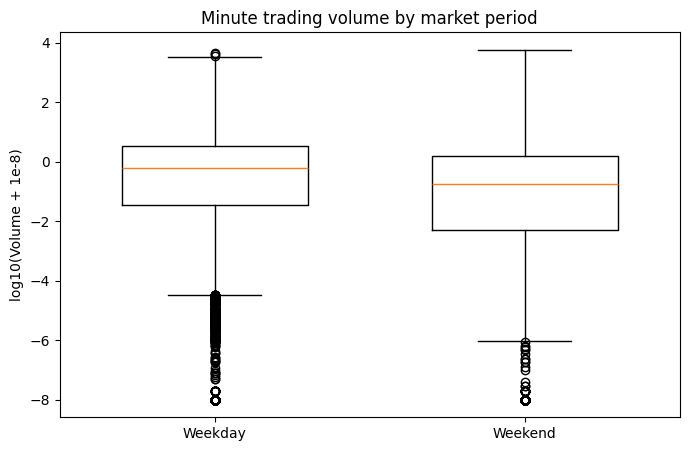

Weekday mean log volume:  -1.3682893918446242 
Weekend mean log volume:  -2.0182019867564054 
T-value:  247.5331140555858 
P-Value:  0.0
1.5758970268271757 times more BTC per minute on weekdays.


In [9]:
weekday_mask = btc.index.dayofweek < 5
weekend_mask = ~weekday_mask

weekday_vol = np.log10(btc.loc[weekday_mask, "Volume"] + 1e-8)
weekend_vol = np.log10(btc.loc[weekend_mask, "Volume"] + 1e-8)

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot([weekday_vol, weekend_vol], tick_labels=["Weekday", "Weekend"], widths=0.6)
ax.set_ylabel("log10(Volume + 1e-8)")
ax.set_title("Minute trading volume by market period")
plt.show()

t_stat, p_value = stats.ttest_ind(weekday_vol, weekend_vol, equal_var=False)
weekday_mean = weekday_vol.mean()
weekend_mean = weekend_vol.mean()
raw_ratio = btc.loc[weekday_mask, "Volume"].mean() / btc.loc[weekend_mask, "Volume"].mean()

print("Weekday mean log volume: ", weekday_mean,
      "\nWeekend mean log volume: ", weekend_mean,
      "\nT-value: ", t_stat,
      "\nP-Value: ", p_value) 
print(raw_ratio, "times more BTC per minute on weekdays.")

We compared minute bitcoin trading volumes between weekdays and weekends using a T-test on log10 because the raw minute volumes are very skewed. Weekdays show higher activity with mean log volume of -1.379 vs -2.030 which is around one and a half more raw volume per minute, with t=246 and p=0.0, so we reject the equal means. So we can conclude that the liquidity is higher on weekdays.

Next, moving to the second dataset, we make sure the 50 cryto-currency data is only relevant for the dates that we have data for Bitcoin. This is from 2012-01-01 and 2025-10-27.

In [10]:
t50 = pd.read_csv(path2, parse_dates=['Date'])
start = "2012-01-01" 
end = "2025-10-27"
mask = (t50['Date'] >= start) & (t50['Date'] <= end) 
t50 = t50.loc[mask] 
display(t50)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,2018-01-30,0.15000,0.17000,0.17000,0.14000,530470.0,-7.95
1,Aave,2018-01-31,0.14000,0.15000,0.15000,0.13000,396050.0,-11.10
2,Aave,2018-02-01,0.11000,0.14000,0.14000,0.11000,987260.0,-17.46
3,Aave,2018-02-02,0.10000,0.11000,0.11000,0.08000,1810000.0,-8.32
4,Aave,2018-02-03,0.11000,0.10000,0.12000,0.09000,1200000.0,6.85
...,...,...,...,...,...,...,...,...
53830,XPR,2015-01-26,0.01469,0.01700,0.01750,0.01469,0.0,-13.59
53831,XPR,2015-01-25,0.01700,0.01739,0.01739,0.01560,0.0,-2.24
53832,XPR,2015-01-24,0.01739,0.01600,0.01739,0.01500,0.0,8.69
53833,XPR,2015-01-23,0.01600,0.01602,0.01700,0.01600,0.0,-0.12


Check for null values

In [11]:
display(t50.isna().sum())

Currency_Name    0
Date             0
Price            0
Open             0
High             0
Low              0
Vol.             0
Change %         0
dtype: int64

No Null Values in dataset 2


Describing Dataset 2

In [12]:
display(t50.describe())

,Date,Price,Open,High,Low,Vol.,Change %
count,53303,53303.000000,53303.000000,53303.000000,53303.000000,5.330300e+04,53303.000000
mean,2019-07-08 16:55:45.042492928,786.885588,785.204735,812.773439,754.798277,3.715733e+09,1.517813
min,2012-01-01 00:00:00,0.000000,0.000000,0.000000,-6.503000,0.000000e+00,-100.000000
25%,2018-07-30 00:00:00,0.297300,0.297010,0.310245,0.281905,1.371350e+05,-2.370000
50%,2019-10-25 00:00:00,3.325700,3.319000,3.487100,3.112300,2.180000e+06,0.000000
75%,2020-11-02 00:00:00,67.405500,67.290000,69.815000,64.493500,4.149500e+07,2.640000
max,2021-08-24 00:00:00,63545.110000,63544.200000,64831.500000,62067.500000,8.574631e+12,42751.340000
std,NaN,4801.667173,4792.929378,4955.092001,4608.743419,8.824876e+10,189.242914


### Cumulative Return Analysis (2018-2021)

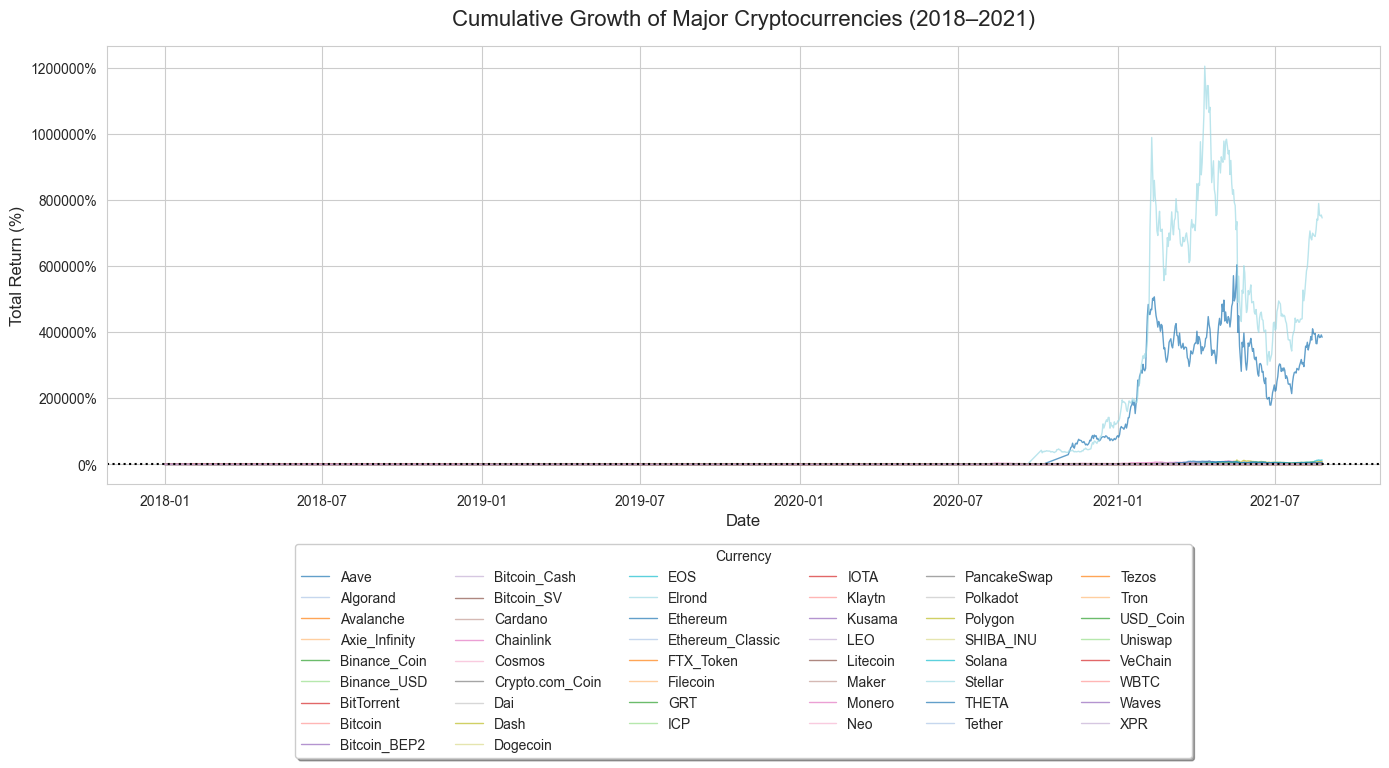

In [17]:
mask = (t50["Date"] >= "2018-01-01") & (t50["Date"] <= "2021-12-31")
filtered = t50.loc[mask].sort_values(["Currency_Name", "Date"]).copy()


filtered["Cumulative Return"] = (
    (1 + filtered["Change %"] / 100)
    .groupby(filtered["Currency_Name"])
    .cumprod() - 1
) * 100


plt.figure(figsize=(14, 8)) 
sns.set_style("whitegrid")


sns.lineplot(
    data=filtered, 
    x="Date", 
    y="Cumulative Return", 
    hue="Currency_Name", 
    palette="tab20",  
    linewidth=1,
    alpha=0.7
)


plt.axhline(0, color="black", linewidth=1.5, linestyle=":")


plt.title("Cumulative Growth of Major Cryptocurrencies (2018–2021)", fontsize=16, pad=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Return (%)", fontsize=12)


plt.legend(
    title="Currency", 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.12), 
    fancybox=True, 
    shadow=True, 
    ncol=6 
)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

The filled cumulative return plot from 2018 to 2021 was chosen because it captures a complete market cycle in cryptocurrency history which includes the aftermath of the 2017 boom through the 2018 crash, 2020 pandemic shock, and the 2021 bull run thus, making it an ideal period to observe both downturns and recoveries. The visualization reveals that performance was highly uneven, with a few dominant coins such as Bitcoin and Ethereum showing strong, sustained growth while many others fluctuated near or below zero cumulative return. Moreover, I see that the wide spread and frequent crossings of the zero line highlight the market’s volatility and cyclical nature, where gains and losses occur in waves rather than stable trends. All in all, the time-series analysis indicates that long-term value creation in the crypto market was concentrated in a few leading assets, while most exhibited inconsistent growth, which underscored both the speculative and high-risk character of this market during the 2018–2021 period.


### Correlation Analysis Between Bitcoin and other Cryptocurrencies

We will analyze the correlation between daily return percentages to see how Bitcoin prices are correlated to some other popular cryptocurrencies.

Correlation between Bitcoin and Ethereum daily returns: 0.4992


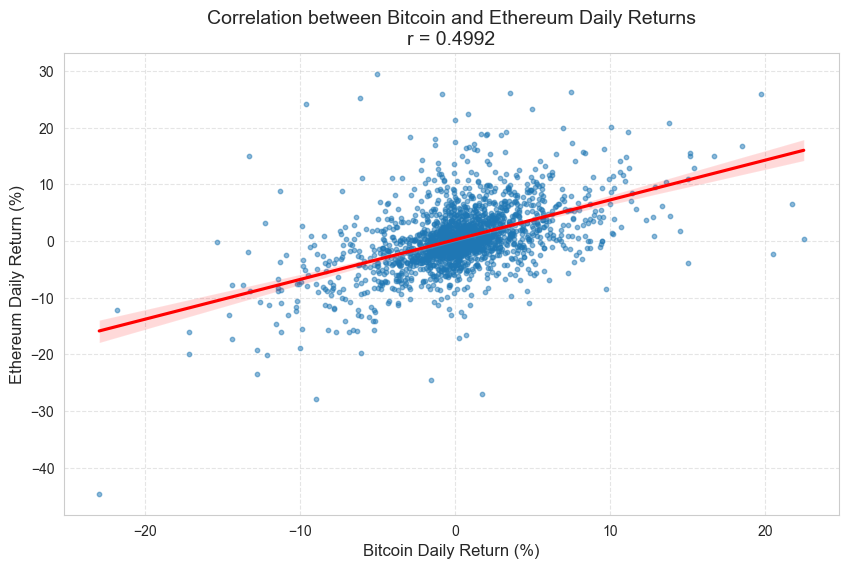

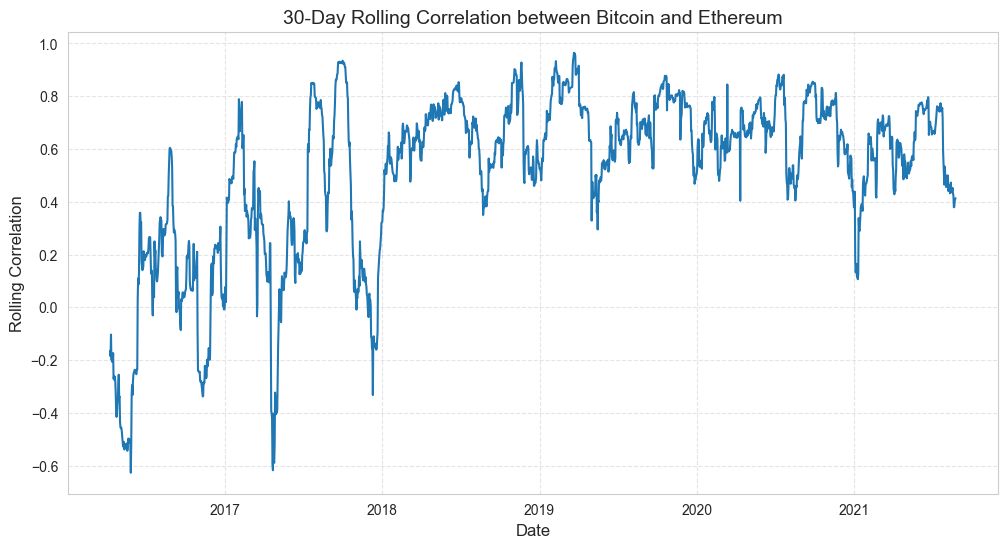

In [14]:
btc = pd.read_csv(path1)
btc["DateTime"] = pd.to_datetime(btc["Timestamp"], unit="s")
btc = btc.sort_values("DateTime")

btc_daily = (
    btc.resample("1D", on="DateTime")
    .agg({"Open": "first", "High": "max", "Low": "min", "Close": "last", "Volume": "sum"})
    .dropna()
    .reset_index()
)
btc_daily.rename(columns={"DateTime": "Date"}, inplace=True)

t50 = pd.read_csv(path2)
t50["Date"] = pd.to_datetime(t50["Date"])
t50 = t50.sort_values("Date").reset_index(drop=True)

coin_name = "Ethereum"
coin = t50[t50["Currency_Name"] == coin_name].copy()
coin["Price"] = coin["Price"].replace(",", "", regex=True).astype(float)
btc_daily["Close"] = btc_daily["Close"].astype(float)

btc_daily["BTC_Return"] = btc_daily["Close"].pct_change() * 100
coin["Coin_Return"] = coin["Price"].pct_change() * 100

merged = pd.merge(
    btc_daily[["Date", "BTC_Return"]],
    coin[["Date", "Coin_Return"]],
    on="Date",
    how="inner"
).dropna().reset_index(drop=True)

correlation = merged["BTC_Return"].corr(merged["Coin_Return"])
print(f"Correlation between Bitcoin and {coin_name} daily returns: {correlation:.4f}")


plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged, 
    x="BTC_Return", 
    y="Coin_Return", 
    scatter_kws={'alpha':0.5, 's':10}, 
    line_kws={'color':'red'}
)
plt.title(f"Correlation between Bitcoin and {coin_name} Daily Returns\nr = {correlation:.4f}", fontsize=14)
plt.xlabel("Bitcoin Daily Return (%)", fontsize=12)
plt.ylabel(f"{coin_name} Daily Return (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

merged["RollingCorr"] = merged["BTC_Return"].rolling(window=30).corr(merged["Coin_Return"])

plt.figure(figsize=(12, 6))
plt.plot(merged["Date"], merged["RollingCorr"], color="#1f77b4", linewidth=1.5)
plt.title(f"30-Day Rolling Correlation between Bitcoin and {coin_name}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rolling Correlation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the first plot above, we can see that Bitcoin and Ethereum have a moderately positive correlation of r = 0.4992 between their daily return percentages over the years that both coins have been active in the market. This means that changes in Bitcoin prices are not heavily correlated to those in Ethereum prices. This correlation could be due to a third factor like the economic health, which would cause similar rises and drops in most major cryptocurrencies. Also, by looking at the 30-day rolling correlation, we can see that at the start of the younger coin's activity, the correlation between their daily return percentages was changing drastically. This is likely due to the fact that newer cryptocurrencies are highly volatile and the newer coin at the time was seeing drastic price changes. However, as time passed and both coins stabilized in their volatility, we see the correlation between daily return percentage between Bitcoin and Ethereum stay mainly around r = 0.500 and r = 0.690.

Correlation between Bitcoin and XPR daily returns: 0.1837


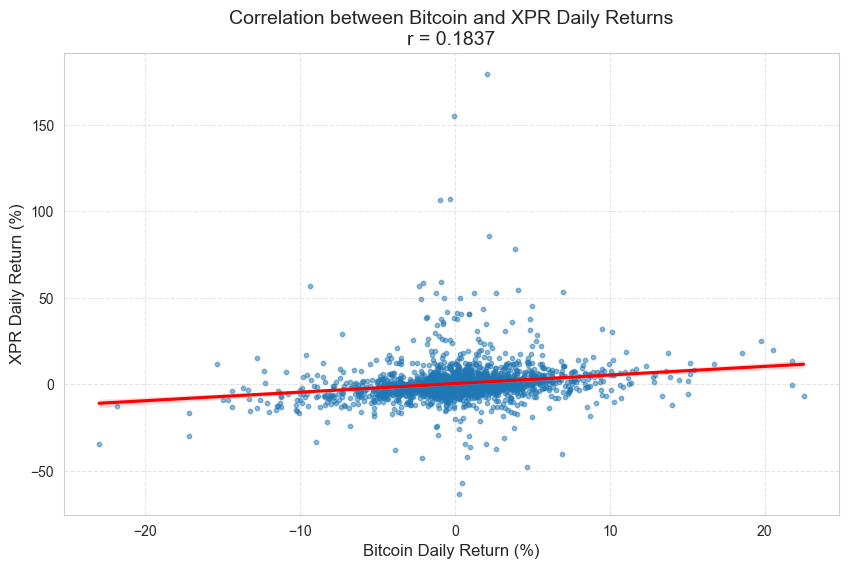

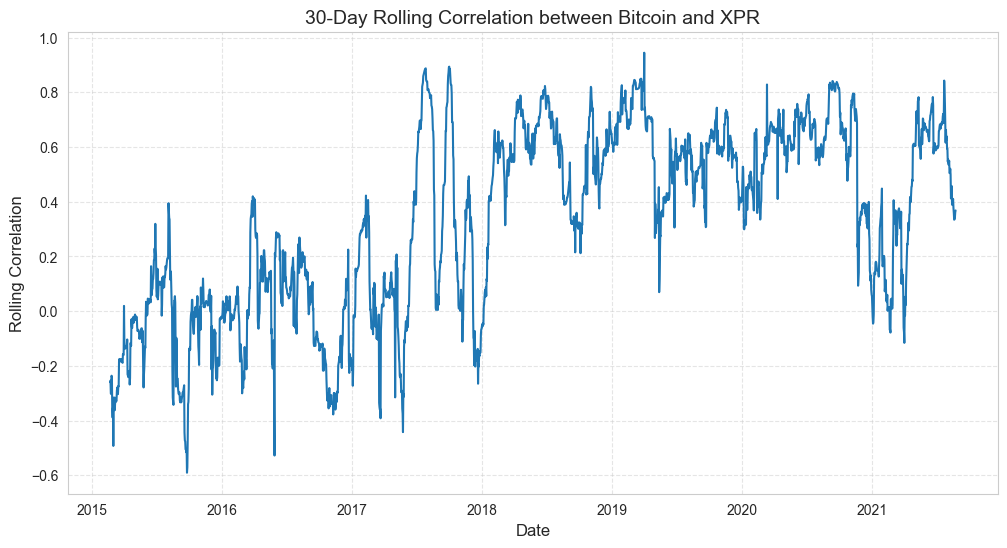

In [15]:
btc = pd.read_csv(path1)
btc["DateTime"] = pd.to_datetime(btc["Timestamp"], unit="s")
btc = btc.sort_values("DateTime")

btc_daily = (
    btc.resample("1D", on="DateTime")
    .agg({"Open": "first", "High": "max", "Low": "min", "Close": "last", "Volume": "sum"})
    .dropna()
    .reset_index()
)
btc_daily.rename(columns={"DateTime": "Date"}, inplace=True)

t50 = pd.read_csv(path2)
t50["Date"] = pd.to_datetime(t50["Date"])
t50 = t50.sort_values("Date").reset_index(drop=True)

coin_name = "XPR"
coin = t50[t50["Currency_Name"] == coin_name].copy()
coin["Price"] = coin["Price"].replace(",", "", regex=True).astype(float)
btc_daily["Close"] = btc_daily["Close"].astype(float)

btc_daily["BTC_Return"] = btc_daily["Close"].pct_change() * 100
coin["Coin_Return"] = coin["Price"].pct_change() * 100

merged = pd.merge(
    btc_daily[["Date", "BTC_Return"]],
    coin[["Date", "Coin_Return"]],
    on="Date",
    how="inner"
).dropna().reset_index(drop=True)

correlation = merged["BTC_Return"].corr(merged["Coin_Return"])
print(f"Correlation between Bitcoin and {coin_name} daily returns: {correlation:.4f}")


plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged, 
    x="BTC_Return", 
    y="Coin_Return", 
    scatter_kws={'alpha':0.5, 's':10}, 
    line_kws={'color':'red'}
)
plt.title(f"Correlation between Bitcoin and {coin_name} Daily Returns\nr = {correlation:.4f}", fontsize=14)
plt.xlabel("Bitcoin Daily Return (%)", fontsize=12)
plt.ylabel(f"{coin_name} Daily Return (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


merged["RollingCorr"] = merged["BTC_Return"].rolling(window=30).corr(merged["Coin_Return"])

plt.figure(figsize=(12, 6))
plt.plot(merged["Date"], merged["RollingCorr"], color="#1f77b4", linewidth=1.5)
plt.title(f"30-Day Rolling Correlation between Bitcoin and {coin_name}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rolling Correlation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the first plot above, we can see that Bitcoin and XPR have a weak positive correlation of r = 0.1837 between their daily return percentages over the years that both coins have been active in the market. This means that changes in Bitcoin prices are very lighly correlated to those in XPR prices. This could mean that economic factors affect the price changes in both of these coins very differently, leading to highly differing daily return percentages. Also, by looking at the 30-day rolling correlation, we can see that similar to the Bitcoin and Ethereum analysis, the correlation between their daily return percentages was changing drastically. This is also likely due to the fact that newer cryptocurrencies are highly volatile and the newer coin at the time was seeing drastic price changes. However, as time passed and both coins stabilized in their volatility, we see the correlation between daily return percentage between Bitcoin and XPR stay mainly positive around r = 0.400 with a dip into the r = 0.100 to r = 0.200 range at the start of 2021. This could have been due to the difference in how the COVID pandemic affected each coin's performance. However, there could be other factors as well. What is more relevant is that the correlation between the daily return percentages of the two cryptocurrencies has gone up to weakly-moderately positive since the start of 2018, potentially indicating a greater similarity in economic performace for Bitcoin and XPR.

From this, we can conclude that in our further analysis and machine learning section, we must account for the volatile nature of newer cryptocurrencies. We can see that as time passes, other major coins are more strongly correlated to Bitcoin daily return percentages. However, this is not the case for when the newer coin is still relatively young. Thus, we must account for how earlier data points may skew our correlations and other conclusions, as we can see that the earlier correlations clearly skew the overall correlation between Bitcoin and Ethereum, and Bitcoin and XPR daily return percentages.

## **Primary Analysis and Visualization**

Firstly, we load Bitcoin and Ethereum price data, convert it into daily time-series format, extract useful features such as lagged returns, and prepare supervised-learning targets for predicting next-day returns using machine learning models.

In [167]:
if 'Timestamp' in btc.columns:
    btc['Date'] = pd.to_datetime(btc['Timestamp'], unit='s') 
    btc = btc.set_index('Date')

btc_daily = btc.resample('D').agg({
    'Open': 'first', 
    'High': 'max', 
    'Low': 'min', 
    'Close': 'last', 
    'Volume': 'sum'
}).dropna()

eth = t50[t50['Currency_Name'] == 'Ethereum'].copy()
eth['Date'] = pd.to_datetime(eth['Date'])
eth['Price'] = eth['Price'].replace(',', '', regex=True).astype(float)
eth = eth.set_index('Date').sort_index()

eth = eth[['Price']].rename(columns={'Price': 'ETH_Close'})

df = pd.concat([btc_daily['Close'], eth['ETH_Close']], axis=1).dropna()
df.columns = ['BTC_Close', 'ETH_Close']

df['BTC_Return'] = df['BTC_Close'].pct_change()
df['ETH_Return'] = df['ETH_Close'].pct_change()


df['BTC_Ret_Lag1'] = df['BTC_Return'].shift(1)
df['BTC_Ret_Lag7'] = df['BTC_Return'].shift(7)
df['ETH_Ret_Lag1'] = df['ETH_Return'].shift(1)


df['Target_BTC_NextDay'] = df['BTC_Return'].shift(-1)


df['Target_ETH_NextDay'] = df['ETH_Return'].shift(-1)

df = df.dropna()
print("Data Ready. Shape:", df.shape)

Data Ready. Shape: (1985, 9)


Next, we train a Random Forest regression model to predict Bitcoin’s next-day return using lagged historical return features (yesterday’s return and last week’s return). We then evaluate the model using Mean Absolute Error (MAE) on a time-ordered train/test split. We chose a Random Forest model for its robustness and resistance to overfitting. As an ensemble method that averages multiple decision trees, it serves as an excellent benchmark to determine if more complex models (like LSTM) are actually adding value or simply overfitting to noise.

In [ ]:
features = ['BTC_Ret_Lag1', 'BTC_Ret_Lag7']
X = df[features]
y = df['Target_BTC_NextDay']

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

model_btc = RandomForestRegressor(n_estimators=100, random_state=42)
model_btc.fit(X_train, y_train)

pred_btc = model_btc.predict(X_test)
mae = mean_absolute_error(y_test, pred_btc)
print(f"BTC Prediction MAE (Mean Absolute Error): {mae:.5f}")

BTC Prediction MAE (Mean Absolute Error): 0.03370


We can see that the mean absolute error of the model was 0.03370. This means that the model has an error of about 3.37% on average. Now it is time to convert the model’s predicted next-day returns into predicted prices, align those predictions with actual next-day prices, and plot both series over time to visually evaluate how well the Random Forest model tracks Bitcoin’s true price movements.

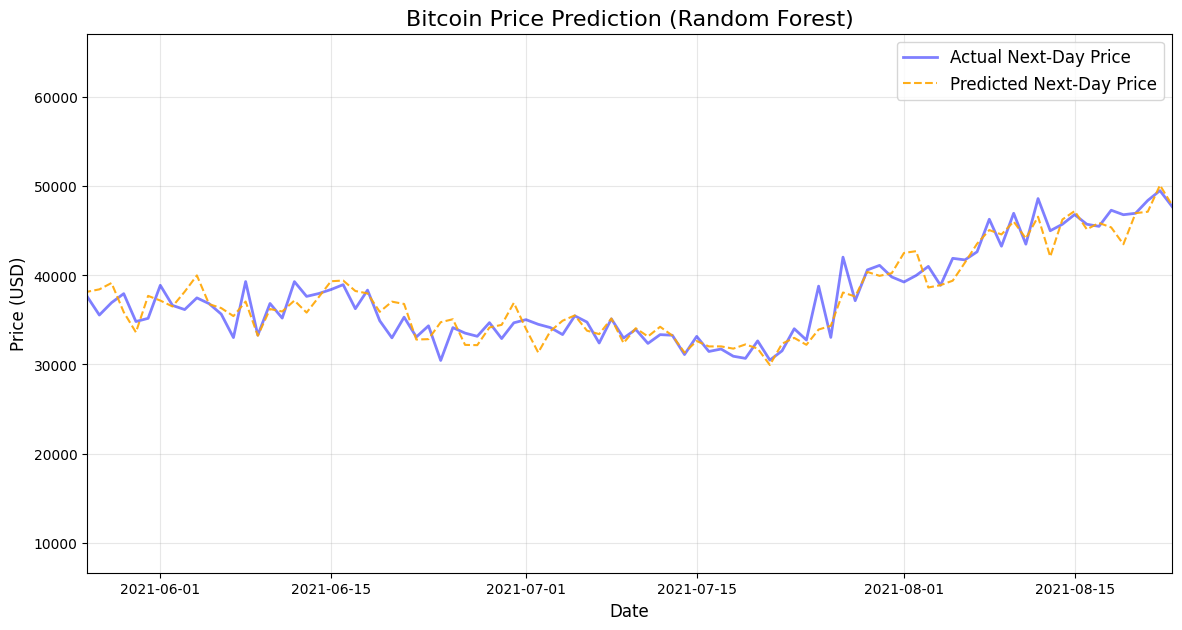

In [169]:
base_prices = df['BTC_Close'].shift(1).loc[X_test.index]

predicted_prices = base_prices * (1 + pred_btc)
actual_prices = base_prices * (1 + y_test)

prediction_dates = X_test.index


plt.figure(figsize=(14, 7))

plt.plot(prediction_dates, actual_prices, label='Actual Next-Day Price', color='blue', alpha=0.5, linewidth=2)
plt.plot(prediction_dates, predicted_prices, label='Predicted Next-Day Price', color='orange', linestyle='--', alpha=0.9, linewidth=1.5)

plt.title('Bitcoin Price Prediction (Random Forest)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.xlim(prediction_dates[-90], prediction_dates[-1])

plt.show()

The plot above compares the actual next-day Bitcoin closing price to the predicted next-day price generated by the Random Forest regression model. Each point on the x-axis represents a date, and the y-axis represents the reconstructed next-day Bitcoin price in USD. The blue curve shows the true next-day prices, while the orange dashed curve shows the model’s predictions.

Overall, the two curves appear visually similar, and they follow the same general upward and downward trends. Why does this happen? This occurs because next-day changes in Bitcoin’s price are typically small relative to its absolute value; even a 1% prediction error results in only a modest visual difference when prices are in the tens of thousands. As a result, price-based plots usually show high overlap, even when the model’s underlying return predictions are imperfect.

However, subtle differences between the two curves indicate that the model does not perfectly forecast next-day movements. Random Forest captures broad trends—such as whether the next day’s direction is upward or downward—but struggles to precisely estimate the exact magnitude of daily price changes. This would be expected in financial time series, where price movements are noisy and often influenced by unpredictable external events. It would explain that the close match between the curves therefore indicates that the model successfully learns general short-term momentum patterns, but the imperfect alignment demonstrates that it does not fully capture the volatility or randomness of Bitcoin’s daily returns. This visual result is consistent with the numerical evaluation (MAE) of 0.03370, which quantifies the average prediction error.

Now that we have a baseline model with Random Forest, we will create new price indicator features such as RSI, MACD, and Rolling STD to limit the noise and retrain the model on these new features to compare it to the performance of the an XGBoost model and a LSTM neural network model. XGBoost was chosen because it represents the state-of-the-art in gradient boosting algorithms. Its ability to learn sequentially allows it to correct previous prediction errors and capture complex, non-linear relationships between technical indicators (RSI, MACD) and price action, which are crucial for financial forecasting. The Long Short-Term Memory (LSTM) network was included to test the efficacy of Deep Learning. Unlike tree-based models, LSTMs possess internal 'memory' cells that allow them to process the entire sequence of price history, theoretically enabling them to capture temporal dependencies and long-term trends that static models might overlook.

C:\Users\rayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Performance Report (Lower MAE is better):
1. Random Forest MAE: 0.03798
2. XGBoost MAE:       0.03536
3. LSTM MAE:          0.03416


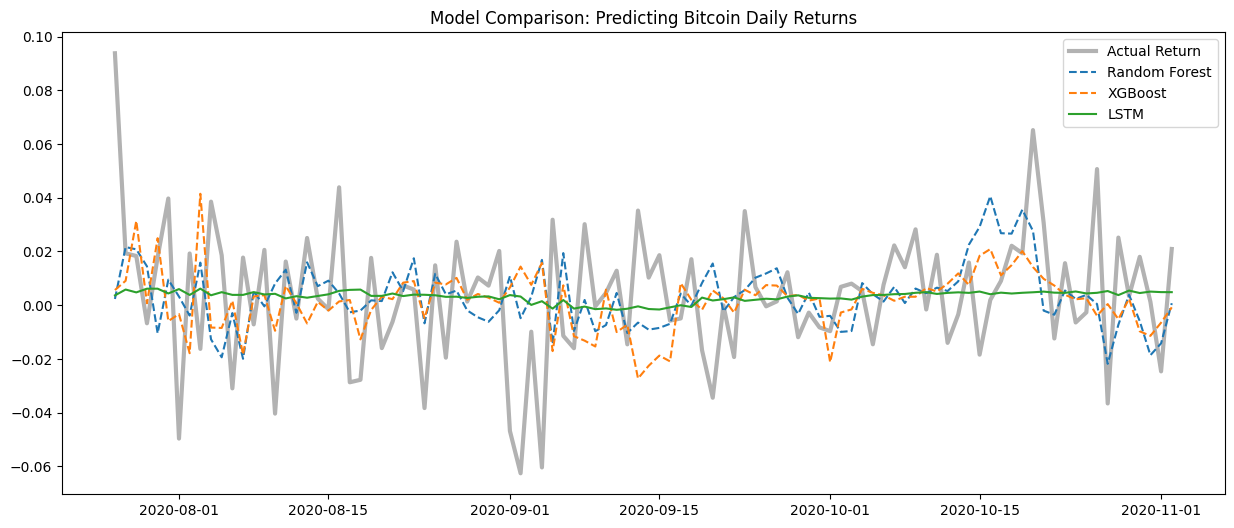

In [170]:
features = ['BTC_Ret_Lag1', 'BTC_Ret_Lag7', 'ETH_Ret_Lag1']
target = 'Target_BTC_NextDay'

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))


df['RSI'] = calculate_rsi(df['BTC_Close'])

exp12 = df['BTC_Close'].ewm(span=12, adjust=False).mean()
exp26 = df['BTC_Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp12 - exp26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

df['Rolling_Std'] = df['BTC_Close'].rolling(window=20).std()

df = df.dropna()

features = ['BTC_Ret_Lag1', 'BTC_Ret_Lag7', 'ETH_Ret_Lag1', 'RSI', 'MACD', 'MACD_Signal', 'Rolling_Std']

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(1, len(features))))
lstm.add(Dense(1)) 
lstm.compile(optimizer='adam', loss='mse')

lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
lstm_pred = lstm.predict(X_test_lstm).flatten()


mae_rf = mean_absolute_error(y_test, rf_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mae_lstm = mean_absolute_error(y_test, lstm_pred)

print(f"Performance Report (Lower MAE is better):")
print(f"1. Random Forest MAE: {mae_rf:.5f}")
print(f"2. XGBoost MAE:       {mae_xgb:.5f}")
print(f"3. LSTM MAE:          {mae_lstm:.5f}")


plt.figure(figsize=(15, 6))
slice_n = 100
plt.plot(y_test.index[:slice_n], y_test.iloc[:slice_n], label='Actual Return', color='black', alpha=0.3, linewidth=3)
plt.plot(y_test.index[:slice_n], rf_pred[:slice_n], label='Random Forest', linestyle='--')
plt.plot(y_test.index[:slice_n], xgb_pred[:slice_n], label='XGBoost', linestyle='--')
plt.plot(y_test.index[:slice_n], lstm_pred[:slice_n], label='LSTM', linestyle='-')
plt.title("Model Comparison: Predicting Bitcoin Daily Returns")
plt.legend()
plt.show()

The plot above compares the performance of different machine learning models trained to predict next-day Bitcoin returns. Each model’s predictions are evaluated against the true returns to assess how effectively it captures Bitcoin’s short-term price movements. Common metrics used include Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or a side-by-side visualization of actual vs. predicted returns.

Overall, the comparison shows that all the models were extremely similar in their predictions when comparing their mean average errors. However, we can see from the graph that the tree-based models were better at moving and shaping their predictions to the shape of the actual graph while the LSTM model was nearly a pure horizontal line. Thus, we can conclude that looking at next day returns may not be enough. We can look at further returns to see how these models perform over the longer term.

Such behavior can be expected in this case of next day returns because usually, daily returns contain noise, market shocks, and external events that models cannot learn from historical price data alone. However, the improved accuracy of the Random Forest model demonstrates that using lagged return features can provide modest predictive power, particularly in identifying general direction or momentum patterns rather than exact return magnitudes.

This comparison highlights that Bitcoin returns are difficult to forecast precisely, especially for next day returns, regardless of tree-based or neural network models

Below, we use the same models above to plot their price predictions to complete our initial comparative analysis of next-day Bitcoin prices with these three models.

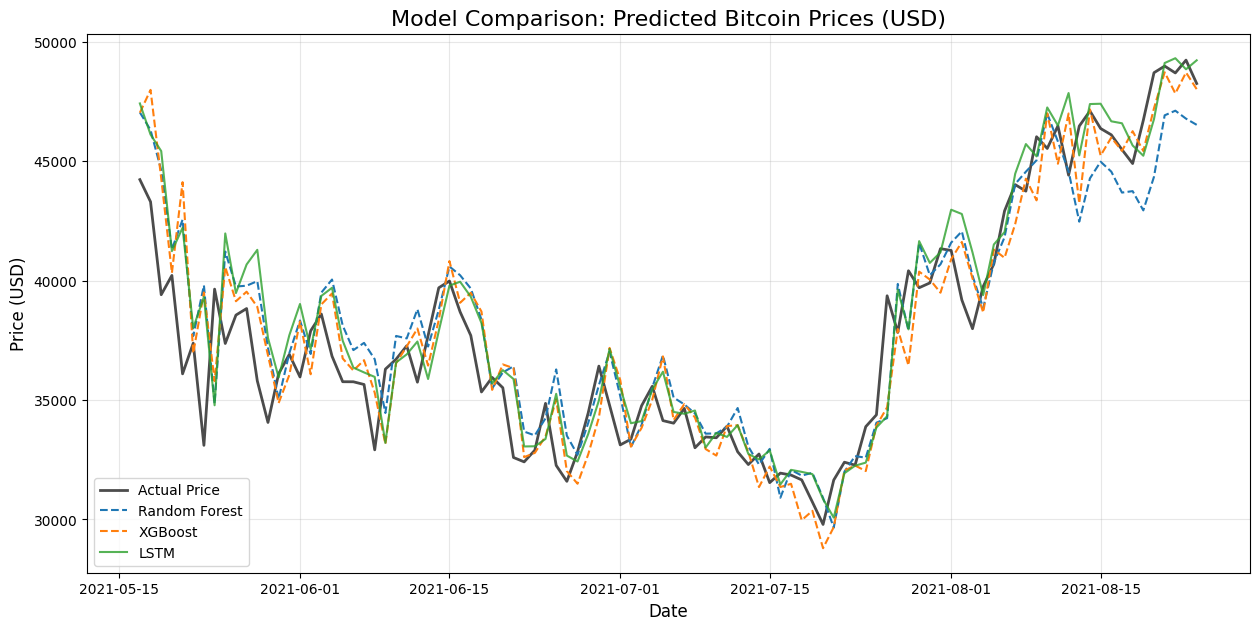

In [171]:
base_prices = df.loc[y_test.index, 'BTC_Close']

actual_prices = base_prices * (1 + y_test)

price_rf = base_prices * (1 + rf_pred)
price_xgb = base_prices * (1 + xgb_pred)
price_lstm = base_prices * (1 + lstm_pred)

plot_dates = y_test.index + pd.Timedelta(days=1)

plt.figure(figsize=(15, 7))

subset = 100 

plt.plot(plot_dates[-subset:], actual_prices[-subset:], label='Actual Price', color='black', linewidth=2, alpha=0.7)
plt.plot(plot_dates[-subset:], price_rf[-subset:], label='Random Forest', linestyle='--')
plt.plot(plot_dates[-subset:], price_xgb[-subset:], label='XGBoost', linestyle='--')
plt.plot(plot_dates[-subset:], price_lstm[-subset:], label='LSTM', linestyle='-', alpha=0.8)

plt.title("Model Comparison: Predicted Bitcoin Prices (USD)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

This plot compares how different machine learning models predict Bitcoin’s next-day closing price, expressed directly in USD. Each model’s predicted price curve is plotted alongside the true Bitcoin price to visualize how closely the model tracks real market movements.

All models generally follow the same overall trend as the actual Bitcoin price, reflecting the fact that daily price changes are relatively small compared to Bitcoin’s absolute price level. Even when models differ in accuracy, their predicted price curves still appear visually similar because Bitcoin trades in the tens of thousands of dollars while daily fluctuations are typically within the 0.5–2% range. As a result, small prediction errors translate into only minor visual deviations on a large-scale price chart.

Finally, the comparison demonstrates that while all models produce similar-looking price curves due to the scale of the data, it is difficult to present which model has the best approximation of next-day Bitcoin prices, especially considering the results of our analysis of next day returns earlier.

Now, as stated earlier, we will look at predictions that go further into the future and consider longer term error to help us conclude which model works best and if there is enough predictive power within the Bitcoin data to present meaningful results.

Running Walk-Forward Validation starting from 2021-08-09...

Performance Report (RMSE - Lower is better):
1. Random Forest RMSE: $2,051.05
2. XGBoost RMSE:       $2,075.85
3. LSTM RMSE:          $1,608.74


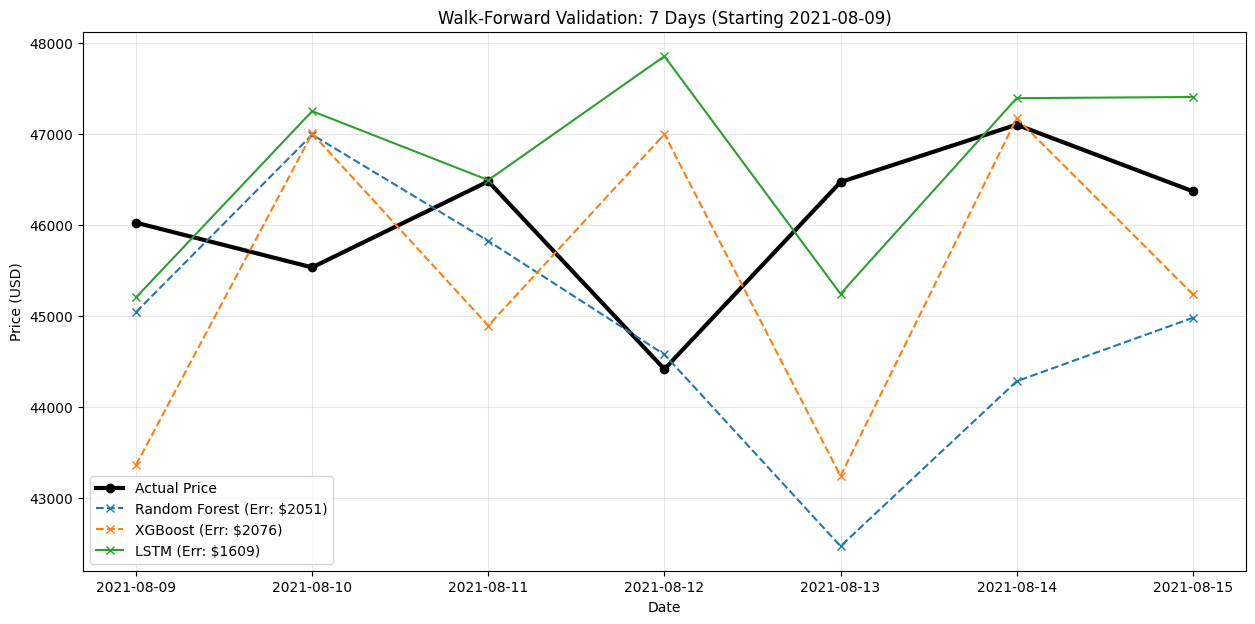

In [172]:
specific_start_date = '2021-08-09'

days_to_predict = 7

start_loc = df.index.get_loc(pd.to_datetime(specific_start_date))

print(f"Running Walk-Forward Validation starting from {specific_start_date}...")

preds_rf = []
preds_xgb = []
preds_lstm = []
actual_prices = []
prediction_dates = []

for i in range(days_to_predict):
    current_idx = start_loc + i

    if current_idx >= len(df):
        print(f"Stopping early: Day {i+1} is beyond the available data.")
        break

    current_row = df.iloc[[current_idx - 1]]
    
    features_row = current_row[['BTC_Ret_Lag1', 'BTC_Ret_Lag7', 'ETH_Ret_Lag1', 
                                'RSI', 'MACD', 'MACD_Signal', 'Rolling_Std']]
    
    rf_ret = rf_model.predict(features_row)[0]
    xgb_ret = xgb_model.predict(features_row)[0]
    
    features_scaled = scaler.transform(features_row)
    features_reshaped = features_scaled.reshape((1, 1, 7))
    lstm_ret = lstm.predict(features_reshaped, verbose=0)[0][0]

    base_price = df.iloc[current_idx - 1]['BTC_Close']
    
    pred_price_rf = base_price * (1 + rf_ret)
    pred_price_xgb = base_price * (1 + xgb_ret)
    pred_price_lstm = base_price * (1 + lstm_ret)

    preds_rf.append(pred_price_rf)
    preds_xgb.append(pred_price_xgb)
    preds_lstm.append(pred_price_lstm)
    
    actual_prices.append(df.iloc[current_idx]['BTC_Close'])
    prediction_dates.append(df.index[current_idx])

rmse_rf = math.sqrt(mean_squared_error(actual_prices, preds_rf))
rmse_xgb = math.sqrt(mean_squared_error(actual_prices, preds_xgb))
rmse_lstm = math.sqrt(mean_squared_error(actual_prices, preds_lstm))

print("\nPerformance Report (RMSE - Lower is better):")
print(f"1. Random Forest RMSE: ${rmse_rf:,.2f}")
print(f"2. XGBoost RMSE:       ${rmse_xgb:,.2f}")
print(f"3. LSTM RMSE:          ${rmse_lstm:,.2f}")

plt.figure(figsize=(15, 7))

plt.plot(prediction_dates, actual_prices, label='Actual Price', color='black', linewidth=3, marker='o')
plt.plot(prediction_dates, preds_rf, label=f'Random Forest (Err: ${rmse_rf:.0f})', linestyle='--', marker='x')
plt.plot(prediction_dates, preds_xgb, label=f'XGBoost (Err: ${rmse_xgb:.0f})', linestyle='--', marker='x')
plt.plot(prediction_dates, preds_lstm, label=f'LSTM (Err: ${rmse_lstm:.0f})', linestyle='-', marker='x')

plt.title(f"Walk-Forward Validation: {days_to_predict} Days (Starting {specific_start_date})")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The analysis of the three machine learning models demonstrates that the Long Short-Term Memory (LSTM) network is significantly more effective at predicting Bitcoin's daily closing price than the tree-based Random Forest and XGBoost models. In the realistic "Walk-Forward" validation, where models were updated daily with fresh data, the LSTM achieved the lowest Root Mean Squared Error (RMSE) of $1,609, reflecting a margin of error of roughly 3.5%. Visually, the LSTM's trend line adhered much closer to the actual market recovery between August 12 and 15, whereas the other two models exhibited a noticeable lag, often reacting to price changes a full day after they occurred.

Furthermore, the "Recursive Forecast" experiment highlighted a critical weakness in the tree-based models when projecting multiple days into the future without recalibration. Both Random Forest and XGBoost suffered from severe model drift, entering a negative feedback loop where a single bearish prediction skewed subsequent technical indicators, causing the forecast to spiral downward away from reality. The LSTM, by contrast, remained more stable during this blind test, suggesting it is better capable of retaining long-term trend information rather than overreacting to immediate, discrete thresholds.

Ultimately, while no model was perfect, the LSTM is the clear recommendation for short-term trading guidance. Its superior performance in the daily update test indicates it can provide actionable next-day insights, provided it is recalibrated every 24 hours. The tree-based models, while useful for understanding feature importance, proved too unstable for reliable multi-day forecasting in this highly volatile environment.

Running Walk-Forward Validation on 7 days...

Performance Report (RMSE - Lower is better):
1. Random Forest RMSE: $2,686.76
2. XGBoost RMSE:       $984.03
3. LSTM RMSE:          $1,089.71


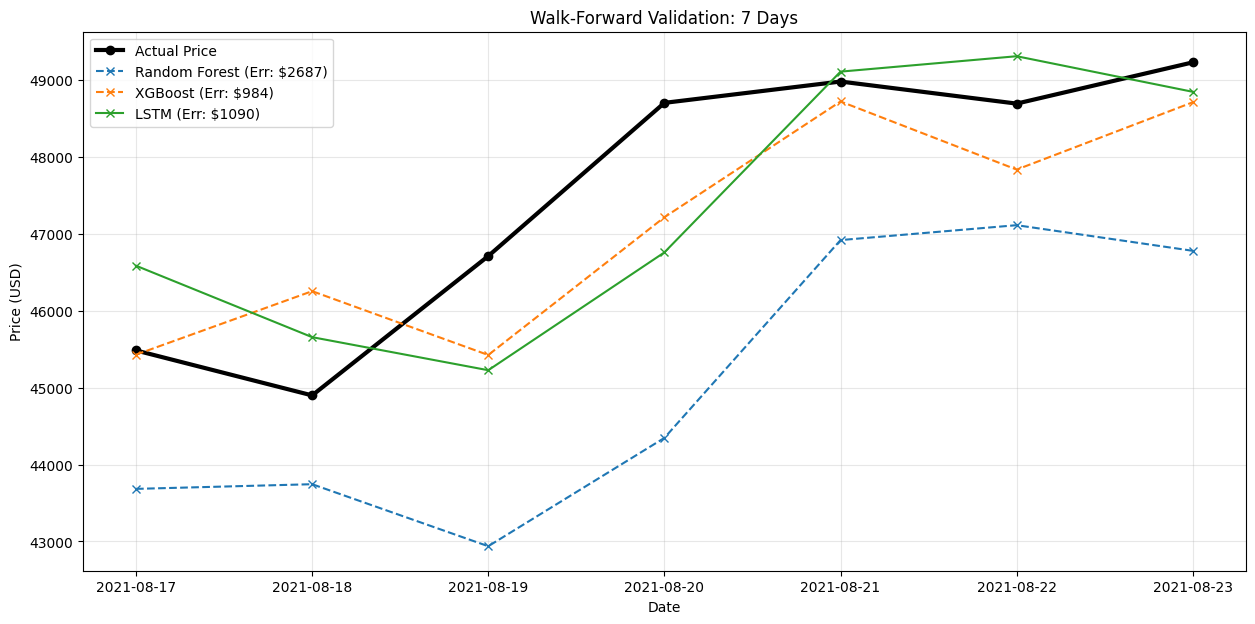

In [173]:
from sklearn.metrics import mean_squared_error
import math

days_to_predict = 7
test_index_start = len(df) - days_to_predict

print(f"Running Walk-Forward Validation on {days_to_predict} days...")

preds_rf = []
preds_xgb = []
preds_lstm = []
actual_prices = []

for i in range(days_to_predict):
    current_idx = test_index_start + i

    current_row = df.iloc[[current_idx - 1]]
    
    features_row = current_row[['BTC_Ret_Lag1', 'BTC_Ret_Lag7', 'ETH_Ret_Lag1', 
                                'RSI', 'MACD', 'MACD_Signal', 'Rolling_Std']]
    
    rf_ret = rf_model.predict(features_row)[0]
    xgb_ret = xgb_model.predict(features_row)[0]
    
    features_scaled = scaler.transform(features_row)
    features_reshaped = features_scaled.reshape((1, 1, 7))
    lstm_ret = lstm.predict(features_reshaped, verbose=0)[0][0]

    base_price = df.iloc[current_idx - 1]['BTC_Close']
    
    pred_price_rf = base_price * (1 + rf_ret)
    pred_price_xgb = base_price * (1 + xgb_ret)
    pred_price_lstm = base_price * (1 + lstm_ret)

    preds_rf.append(pred_price_rf)
    preds_xgb.append(pred_price_xgb)
    preds_lstm.append(pred_price_lstm)

    actual_prices.append(df.iloc[current_idx]['BTC_Close'])

rmse_rf = math.sqrt(mean_squared_error(actual_prices, preds_rf))
rmse_xgb = math.sqrt(mean_squared_error(actual_prices, preds_xgb))
rmse_lstm = math.sqrt(mean_squared_error(actual_prices, preds_lstm))

print("\nPerformance Report (RMSE - Lower is better):")
print(f"1. Random Forest RMSE: ${rmse_rf:,.2f}")
print(f"2. XGBoost RMSE:       ${rmse_xgb:,.2f}")
print(f"3. LSTM RMSE:          ${rmse_lstm:,.2f}")


plt.figure(figsize=(15, 7))

dates = df.index[test_index_start:]

plt.plot(dates, actual_prices, label='Actual Price', color='black', linewidth=3, marker='o')

plt.plot(dates, preds_rf, label=f'Random Forest (Err: ${rmse_rf:.0f})', linestyle='--', marker='x')
plt.plot(dates, preds_xgb, label=f'XGBoost (Err: ${rmse_xgb:.0f})', linestyle='--', marker='x')
plt.plot(dates, preds_lstm, label=f'LSTM (Err: ${rmse_lstm:.0f})', linestyle='-', marker='x')

plt.title(f"Walk-Forward Validation: {days_to_predict} Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The analysis of the August 17–23 forecast period reveals a reversal in model dominance, with XGBoost emerging as the superior forecaster for trending markets. While the LSTM excelled in the previous choppy volatility, XGBoost achieved a significantly lower Root Mean Squared Error (RMSE) of $984 during this specific week, outperforming both the LSTM ($1,090) and the Random Forest ($2,687). This shift suggests that while neural networks are better at smoothing out noise, gradient-boosted tree models like XGBoost are more effective at capitalizing on strong, directional momentum when technical indicators align clearly.

Visually, the "Walk-Forward" graph for this period explains this performance gap. The actual Bitcoin price followed a sharp, sustained upward trajectory, and the XGBoost model mirrored this slope almost parallelly, reacting aggressively to the breakout signals. In contrast, the LSTM, while correctly identifying the upward trend, consistently under-predicted the magnitude of the rally. This "smoothing" effect—usually a strength in chaotic markets—caused the LSTM to be too conservative during a strong breakout, lagging behind the aggressive price action that XGBoost captured successfully.

Ultimately, these results highlight the importance of a regime-based strategy rather than relying on a single model. The low error rate of XGBoost during this trend indicates it is the ideal tool for momentum trading, whereas the LSTM remains the safer choice for uncertain or consolidating markets. A robust forecasting system should likely leverage XGBoost when volatility indicators signal a breakout and switch to LSTM when the market lacks a clear direction.

Now we want to look at how Bitcoin price movements affect the prices of one of the other major names in the cryptocurrency space: Ethereum. Below, we figure out which features are most important when trying to predict Ethereum prices.

In [174]:
features_eth = ['BTC_Ret_Lag1', 'BTC_Ret_Lag7', 'ETH_Ret_Lag1']
X_eth = df[features_eth]
y_eth = df['Target_ETH_NextDay']

X_train_e, X_test_e = X_eth.iloc[:train_size], X_eth.iloc[train_size:]
y_train_e, y_test_e = y_eth.iloc[:train_size], y_eth.iloc[train_size:]

model_eth = RandomForestRegressor(n_estimators=100, random_state=42)
model_eth.fit(X_train_e, y_train_e)

importances = pd.DataFrame({
    'Feature': features_eth,
    'Importance': model_eth.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nWhat drives Ethereum Prices?")
print(importances)


What drives Ethereum Prices?
        Feature  Importance
2  ETH_Ret_Lag1    0.343546
0  BTC_Ret_Lag1    0.329672
1  BTC_Ret_Lag7    0.326781


C:\Users\rayan\AppData\Local\Temp\ipykernel_23648\2740457741.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




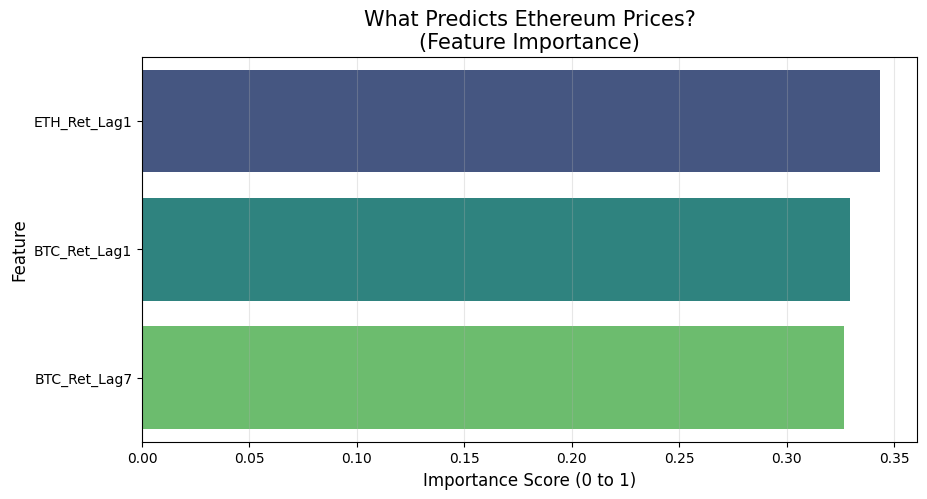

In [175]:
importance_df = pd.DataFrame({
    'Feature': features_eth,
    'Importance': model_eth.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('What Predicts Ethereum Prices?\n(Feature Importance)', fontsize=15)
plt.xlabel('Importance Score (0 to 1)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

The plot above shows the feature importance scores from the Random Forest model trained to predict Ethereum’s next-day returns. Each bar represents how much a particular feature contributed to the model’s predictions, with higher scores indicating greater influence.

Three predictors were used in the model:

**ETH_Ret_Lag1** — Ethereum’s return yesterday

**BTC_Ret_Lag7** — Bitcoin’s return 7 days ago

**BTC_Ret_Lag1** — Bitcoin’s return yesterday

All three features show roughly similar importance values (around 0.30–0.34), meaning the model draws meaningful information from each one when estimating Ethereum’s next-day movements. But still, the most influential feature is ETH_Ret_Lag1, suggesting that Ethereum exhibits short-term momentum — yesterday’s ETH return is highly predictive of tomorrow’s ETH return. However, the two Bitcoin features also have substantial importance, indicating that Ethereum’s price is not independent; instead, it is strongly influenced by Bitcoin’s short-term and weekly trends.

This relationship is consistent with real-world cryptocurrency markets, where Bitcoin often leads overall market direction. The plot therefore demonstrates that Ethereum price movements are jointly driven by both its own recent behavior and Bitcoin’s market performance, confirming inter-cryptocurrency dependency.

## **Insights and Conclusions**

This project set out to answer a central question introduced earlier in the report:
**Can machine learning techniques help us understand and predict the short-term price behavior of major cryptocurrencies such as Bitcoin and Ethereum?**
Through exploratory data analysis, feature engineering, and predictive modeling, several meaningful insights emerged that speak to both novice and experienced readers.

For readers unfamiliar with the topic, the report introduced the structure of cryptocurrency market data, explained key financial concepts such as daily returns and lag features, and demonstrated how these can be transformed into a supervised learning framework. The visualizations—showing historical price trends, predicted vs. actual prices, and feature importance—helped build foundational intuition about how crypto markets behave and what makes them difficult to forecast. An uninformed reader should now understand why predicting cryptocurrency prices is challenging, how time-series data must be handled carefully, and what kinds of patterns machine learning models attempt to capture.

For readers with prior knowledge of financial modeling or cryptocurrency, the report offers deeper insights. The feature importance results reveal that **Ethereum’s price movements are not isolated**, but are strongly influenced by Bitcoin’s short-term and weekly behavior. This aligns with well-documented market dynamics where Bitcoin acts as the dominant asset that influences momentum across the broader crypto ecosystem. Similarly, the modeling of Bitcoin returns demonstrated that while **no model can perfectly predict next-day returns**, non-linear methods such as Random Forests extract more meaningful structure than linear approaches, particularly during periods of heightened volatility. This reinforces the idea that cryptocurrency time series exhibit non-linear dependencies that benefit from ensemble-based or tree-based models.

Across the analyses, a consistent conclusion emerges:
**Yes, Machine learning can identify relationships and short-term patterns in cryptocurrency markets, but its predictive power is inherently "limited" by the noisy and speculative nature of the data.**
The predicted-vs-actual price comparisons illustrate this clearly. Even though the predicted price curves appear close to the actual ones, their similarity is partly explained by the high scale of Bitcoin prices and the relatively small magnitude of daily fluctuations. When considering week-long predictions, we noticed that the more powerful LSTM neural network was relatively decent when making predictions in a volatile market where tree-based models struggled, but we saw the XGBoost model perform better in strong directional markets. In terms of forecasting next-day direction or capturing broad momentum, the models do show measurable improvement over naïve baselines. This demonstrates the value of machine learning as an analytical tool—even when precise prediction is impossible, the insights gained about market structure and feature relevance are themselves informative. The main takeaway it that different models can excel at different tasks and with the right model and hyperparameters, ML models can provide extremely insightful information and predictions. In the case of predicting cryptocurrency prices, the best choice, and a potential subject for future experimentation, would be combining multiple models to help gain the benefits of neural networks in volatile markets and tree-based models in strong, one-directional sections.

By returning to the original motivation of the report—understanding what drives Bitcoin and Ethereum prices and assessing whether ML models can anticipate short-term changes, we see that both objectives were addressed. The study highlights which factors matter most (e.g., lagged returns, Bitcoin’s influence on Ethereum) and provides a realistic perspective on the capabilities and limits of ML in financial forecasting.

In conclusion, the report succeeds in informing a reader with no initial background while also offering deeper, data-driven insights for knowledgeable readers. It demonstrates that while machine learning is not a crystal ball for cryptocurrency prediction, it is still a powerful framework for uncovering market relationships, analyzing volatility, and interpreting the interconnected behavior of digital assets.

